# Prosper Loans Data Exploration

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

In [80]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [81]:
# load in the dataset into a pandas dataframe, print statistics
prosper_df = pd.read_csv('prosperLoanData.csv')
prosper_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [82]:
prosper_df.shape

(113937, 81)

In [83]:
prosper_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

#### Remove irrelevant columns


In [84]:
prosper_df = prosper_df.loc[:,('ListingKey','ListingCreationDate','Term','LoanStatus', 'BorrowerAPR', 'BorrowerRate',
                            'LenderYield','EstimatedLoss','EstimatedReturn', 'ProsperRating (numeric)',
                            'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
                            'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'DebtToIncomeRatio',
                            'IncomeRange', 'IncomeVerifiable','StatedMonthlyIncome', 'LoanOriginalAmount',
                            'MonthlyLoanPayment', 'LP_ServiceFees', 'LP_CollectionFees', 'PercentFunded', 'Investors')]

In [85]:
prosper_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 27 columns):
ListingKey                   113937 non-null object
ListingCreationDate          113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
EstimatedLoss                84853 non-null float64
EstimatedReturn              84853 non-null float64
ProsperRating (numeric)      84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
IsBorrowerHomeowner          113937 non-null bool
DebtToI

#### Make copy of DataFrame and convert columns to appropriate datatypes

In [86]:
prosper_clean = prosper_df.copy()
prosper_clean.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,LP_ServiceFees,LP_CollectionFees,PercentFunded,Investors
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,...,0.17,"$25,000-49,999",True,3083.333333,9425,330.43,-133.18,0.0,1.0,258
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,0.0249,0.05470,6.0,...,0.18,"$50,000-74,999",True,6125.000000,10000,318.93,0.00,0.0,1.0,1
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,...,0.06,Not displayed,True,2083.333333,3001,123.32,-24.20,0.0,1.0,41
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,0.0249,0.06000,6.0,...,0.15,"$25,000-49,999",True,2875.000000,10000,321.45,-108.01,0.0,1.0,158
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,0.0925,0.09066,3.0,...,0.26,"$100,000+",True,9583.333333,15000,563.97,-60.27,0.0,1.0,20


In [87]:
#Rename columns 
prosper_clean = prosper_clean.rename(columns={'ListingCategory (numeric)': 'ListingCategory',
                                              'ProsperRating (Alpha)': 'ProsperRating'})
prosper_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 27 columns):
ListingKey                 113937 non-null object
ListingCreationDate        113937 non-null object
Term                       113937 non-null int64
LoanStatus                 113937 non-null object
BorrowerAPR                113912 non-null float64
BorrowerRate               113937 non-null float64
LenderYield                113937 non-null float64
EstimatedLoss              84853 non-null float64
EstimatedReturn            84853 non-null float64
ProsperRating (numeric)    84853 non-null float64
ProsperRating              84853 non-null object
ProsperScore               84853 non-null float64
ListingCategory            113937 non-null int64
BorrowerState              108422 non-null object
Occupation                 110349 non-null object
EmploymentStatus           111682 non-null object
IsBorrowerHomeowner        113937 non-null bool
DebtToIncomeRatio          105383 non-nul

In [88]:
#Set order for categorical variables
ordinal_var_dict = {'ProsperRating': ['AA','A','B','C', 'D', 'E', 'HR','N/A'],
                    'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    prosper_clean[var] = prosper_clean[var].astype(ordered_var)

In [89]:
#Convert datatype to 'category' for categorical variable
prosper_clean['LoanStatus']=prosper_clean['LoanStatus'].astype('category')
prosper_clean['BorrowerState']=prosper_clean['BorrowerState'].astype('category')
prosper_clean['ListingCategory']= prosper_clean['ListingCategory'].astype('category')
prosper_clean['Occupation']= prosper_clean['Occupation'].astype('category')
prosper_clean['EmploymentStatus']= prosper_clean['EmploymentStatus'].astype('category')
prosper_clean['ProsperScore'] = prosper_clean['ProsperScore'].astype('category')
prosper_clean['Term']=prosper_clean['Term'].astype('category')

In [90]:
#Convert ListingCreationDate to datetime
prosper_clean['ListingCreationDate'] = pd.to_datetime(prosper_clean['ListingCreationDate']) 


In [91]:
#Convert all values equal to 11 in ProsperScore column to 10
prosper_clean.loc[prosper_clean['ProsperScore']==11,'ProsperScore']=10

In [92]:
prosper_clean['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
10.0     6206
2.0      5766
1.0       992
11.0        0
Name: ProsperScore, dtype: int64

In [93]:
prosper_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 27 columns):
ListingKey                 113937 non-null object
ListingCreationDate        113937 non-null datetime64[ns]
Term                       113937 non-null category
LoanStatus                 113937 non-null category
BorrowerAPR                113912 non-null float64
BorrowerRate               113937 non-null float64
LenderYield                113937 non-null float64
EstimatedLoss              84853 non-null float64
EstimatedReturn            84853 non-null float64
ProsperRating (numeric)    84853 non-null float64
ProsperRating              84853 non-null category
ProsperScore               84853 non-null category
ListingCategory            113937 non-null category
BorrowerState              108422 non-null category
Occupation                 110349 non-null category
EmploymentStatus           111682 non-null category
IsBorrowerHomeowner        113937 non-null bool
DebtToIncomeRati

In [94]:
#Replace the numbers in the ListingCategory column with its respective names
category_dict = {0:  'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 
                4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption',
                9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 
                 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

prosper_clean['ListingCategory']=prosper_clean['ListingCategory'].map(category_dict)

In [95]:
prosper_clean['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

In [96]:
prosper_clean.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,LP_ServiceFees,LP_CollectionFees,PercentFunded,Investors
0,1021339766868145413AB3B,2007-08-26 19:09:29.263,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,...,0.17,"$25,000-49,999",True,3083.333333,9425,330.43,-133.18,0.0,1.0,258
1,10273602499503308B223C1,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,0.0820,0.0249,0.05470,6.0,...,0.18,"$50,000-74,999",True,6125.000000,10000,318.93,0.00,0.0,1.0,1
2,0EE9337825851032864889A,2007-01-05 15:00:47.090,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,...,0.06,NaN,True,2083.333333,3001,123.32,-24.20,0.0,1.0,41
3,0EF5356002482715299901A,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,0.0874,0.0249,0.06000,6.0,...,0.15,"$25,000-49,999",True,2875.000000,10000,321.45,-108.01,0.0,1.0,158
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,0.1985,0.0925,0.09066,3.0,...,0.26,"$100,000+",True,9583.333333,15000,563.97,-60.27,0.0,1.0,20


In [97]:
prosper_clean.shape

(113937, 27)

### What is the structure of your dataset?

There are 113,937 loan listings in the dataset with 26 features. Most variables are numeric in nature, but we have categorical variables such as LoanStatus, ListingCategory, BorrowerState, Occupation and EmploymentStatus. 


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting **BorrowerAPR**. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the following features to have a huge impact on the aforementioned features of interest:
- **LoanOriginalAmount**
- **DebtToIncomeRatio**
- **MonthlyLoanPayment**
- **StatedMonthlyIncome**
- **LoanStatus**
- **EmploymentStatus**

I also expect a minor impact from the following features:
- **Occupation**
- **BorrowerState**
- **Term**


## Univariate Exploration

### Quantitative Data

In [98]:
prosper_clean.describe()

,BorrowerAPR,BorrowerRate,LenderYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,LP_ServiceFees,LP_CollectionFees,PercentFunded,Investors
count,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,105383.000000,1.139370e+05,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,0.218828,0.192764,0.182701,0.080306,0.096068,4.072243,0.275947,5.608026e+03,8337.01385,272.475783,-54.725641,-14.242698,0.998584,80.475228
std,0.080364,0.074818,0.074516,0.046764,0.030403,1.673227,0.551759,7.478497e+03,6245.80058,192.697812,60.675425,109.232758,0.017919,103.239020
min,0.006530,0.000000,-0.010000,0.004900,-0.182700,1.000000,0.000000,0.000000e+00,1000.00000,0.000000,-664.870000,-9274.750000,0.700000,1.000000
25%,0.156290,0.134000,0.124200,0.042400,0.074080,3.000000,0.140000,3.200333e+03,4000.00000,131.620000,-73.180000,0.000000,1.000000,2.000000
50%,0.209760,0.184000,0.173000,0.072400,0.091700,4.000000,0.220000,4.666667e+03,6500.00000,217.740000,-34.440000,0.000000,1.000000,44.000000
75%,0.283810,0.250000,0.240000,0.112000,0.116600,5.000000,0.320000,6.825000e+03,12000.00000,371.580000,-13.920000,0.000000,1.000000,115.000000
max,0.512290,0.497500,0.492500,0.366000,0.283700,7.000000,10.010000,1.750003e+06,35000.00000,2251.510000,32.060000,0.000000,1.012500,1189.000000


#### BorrowerAPR

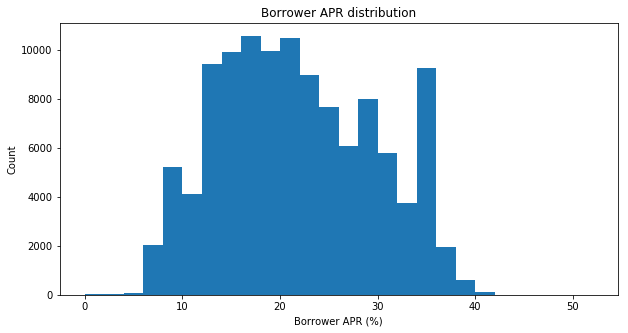

In [99]:
#change the rate to percentage by multiplying row by 100
APR_perc = prosper_clean['BorrowerAPR']*100

binsize = 2
bins = np.arange(0, APR_perc.max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = APR_perc, bins = bins)
plt.xlabel('Borrower APR (%)')
plt.ylabel('Count')
plt.title('Borrower APR distribution')
plt.show()


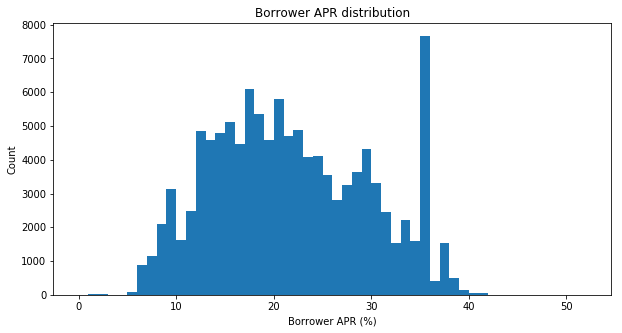

In [100]:
#Investigating further on a smaller bin size
binsize = 1
bins = np.arange(0, APR_perc.max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = APR_perc, bins = bins)
plt.xlabel('Borrower APR (%)')
plt.ylabel('Count')
plt.title('Borrower APR distribution')
plt.show()

- A loan APR is a more effective rate to consider when comparing loans. It includes not only the interest expense but also all fees and costs involved in procuring the loan. 
- The summary statistics above shows us the average loan interest rate(APR less fee costs) is seen to be less than the average APR rate. This is what we expect. 
- In the case of BorrowerAPR, the smaller binsize proves to be very insightful. The large spike at about 36% suggests to me that this is indeed the most common loan APR. There are a wide range of factors that might influence this huge APR and I'll be exploring these in the subsequent analyses. 

#### BorrowerRate

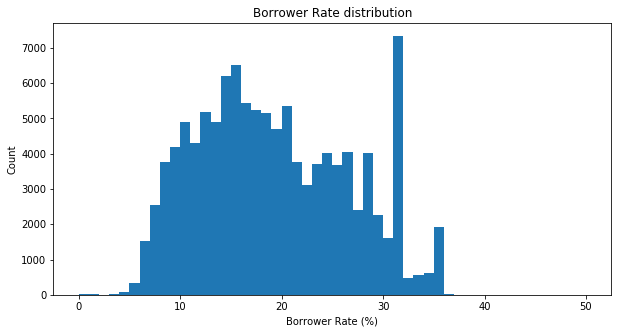

In [101]:
rate_perc = prosper_clean['BorrowerRate']*100

binsize = 1
bins = np.arange(0, rate_perc.max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = rate_perc, bins = bins)
plt.xlabel('Borrower Rate (%)')
plt.ylabel('Count')
plt.title('Borrower Rate distribution')
plt.show()

- This is essentially the interest rate distribution. 32% is the most popular interest rate level on Prosper loans 

#### LenderYield

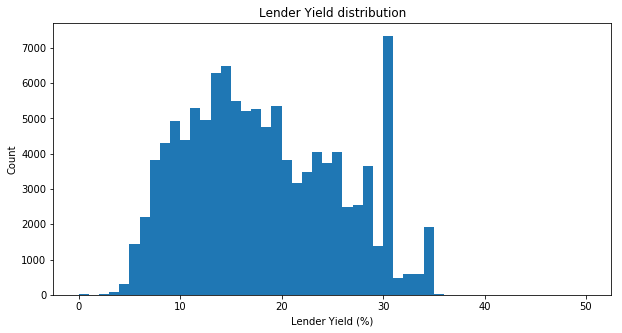

In [102]:
lend_perc = prosper_clean['LenderYield']*100

binsize = 1
bins = np.arange(0, lend_perc.max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = lend_perc, bins = bins)
plt.xlabel('Lender Yield (%)')
plt.ylabel('Count')
plt.title('Lender Yield distribution')
plt.show()

- The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
- Most loans are giving lenders a yield of about 31%.

#### DebtToIncomeRatio

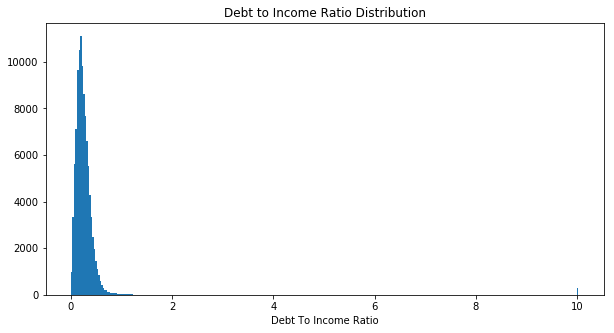

In [103]:
#Debt to Income Ration Distribution
binsize = 0.03
bins = np.arange(0, prosper_clean['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = prosper_clean, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt To Income Ratio')
plt.title('Debt to Income Ratio Distribution')
plt.show()

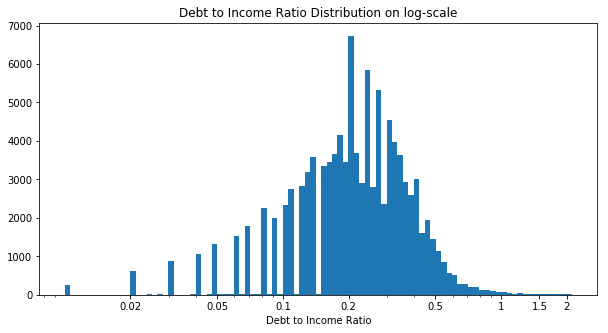

In [104]:
#The summary statistics table shows us that most of the values here are less than 2. Plot on a log-scale.
log_binsize = 0.025
bins = 10 ** np.arange(-2, np.log10(2)+log_binsize, log_binsize)
plt.figure(figsize=[10, 5])
plt.hist(data = prosper_clean, x = 'DebtToIncomeRatio', bins = bins)
plt.xscale('log')
plt.xticks([2e-2, 5e-2, 1e-1, 2e-1, 5e-1, 1, 1.5, 2], ['0.02', '0.05', '0.1', '0.2', '0.5', '1', '1.5','2'])
plt.xlabel('Debt to Income Ratio')
plt.title('Debt to Income Ratio Distribution on log-scale')
plt.show()

- This is the debt to income ratio of the borrower at the time the credit profile was pulled. 
- DebtToIncomeRatio has a fairly long-tailed distribution with a lot of loans on the low debt to income ratio end. Hence I decided to plot on a log-scale. 
- A lot of the borrowers at Prosper loans seems to have a debt to income ratio of about 20% which isn't bad. It means that they have 80% left off their monthly income and this is enough to get qualified for a mortgage. 

#### StatedMonthlyIncome

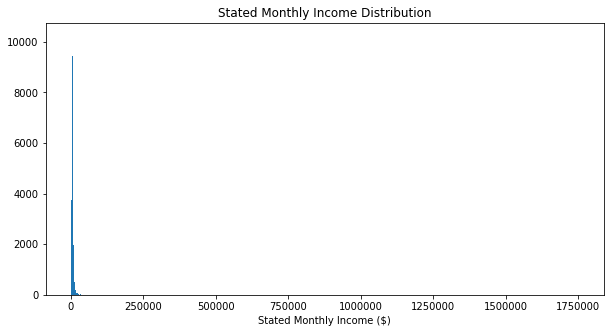

In [105]:
binsize = 500
bins = np.arange(0, prosper_clean['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = prosper_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Stated Monthly Income ($)')
plt.title('Stated Monthly Income Distribution')
plt.show()

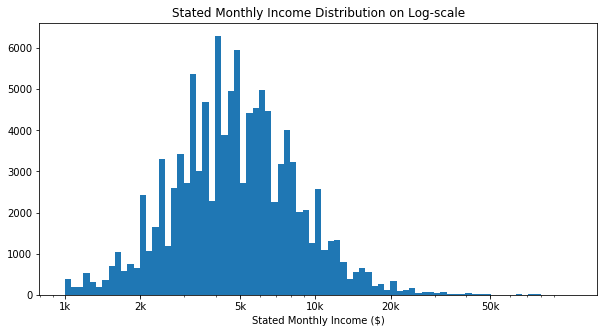

In [106]:
#Most of the values here are less than $100000. Plot on a log-scale.
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(100000)+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = prosper_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k','5k', '10k', '20k', '50k'])
plt.xlabel('Stated Monthly Income ($)')
plt.title('Stated Monthly Income Distribution on Log-scale')
plt.show()

- The monthly income the borrower stated at the time the listing was created.
- StatedMonthlyIncome has a fairly long-tailed distribution with a lot of borrowers on the low monthly income end. Hence I decided to plot on a log-scale. 
- The monthly income distribution closely follows a normal distribution. Most Borrowers at Prosper loans seem to have a monthly income of about \\$4000 - \\$5000.

#### LoanOriginalAmount

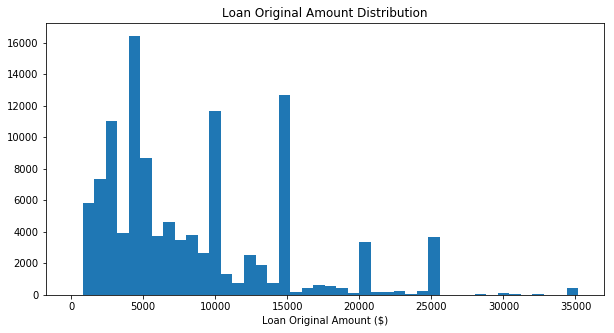

In [107]:
binsize = 800
bins = np.arange(0, prosper_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = prosper_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount ($)')
plt.title('Loan Original Amount Distribution')
plt.show()

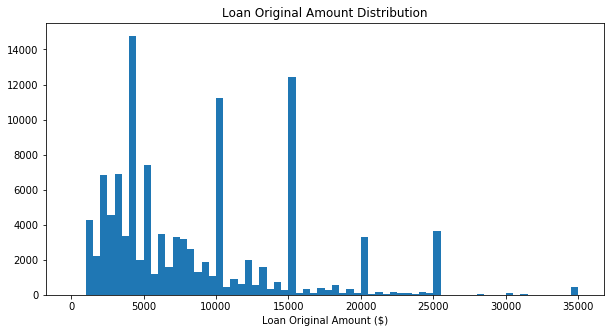

In [108]:
#Investigating further with a smaller bin size
binsize = 500
bins = np.arange(0, prosper_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = prosper_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount ($)')
plt.title('Loan Original Amount Distribution')
plt.show()

- This is the origination amount of the loan.
- Most of Prosper loans' loans to borrowers seem to be at about \\$3000, \\$10000 & \\$15000.

#### MonthlyLoanPayment

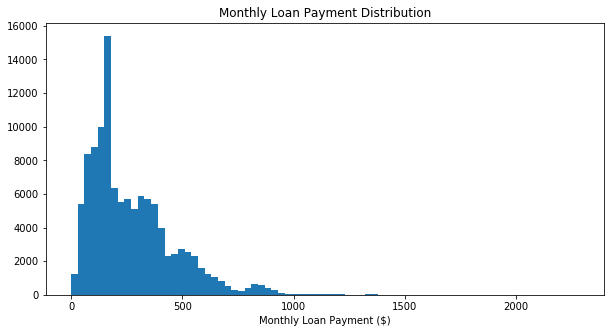

In [109]:
binsize = 30
bins = np.arange(0, prosper_clean['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = prosper_clean, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Monthly Loan Payment ($)')
plt.title('Monthly Loan Payment Distribution')
plt.show()

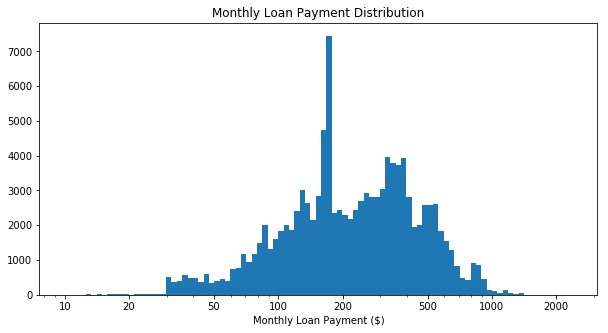

In [110]:
#On a log-scale
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(prosper_clean['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = prosper_clean, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3], ['10', '20','50', '100', '200', '500', '1000', '2000'])
plt.xlabel('Monthly Loan Payment ($)')
plt.title('Monthly Loan Payment Distribution')
plt.show()

- This is the scheduled monthly loan payment.
- The long tailed distibrution promted me to plot on a log-scale.
- Immediately, I see a spike around the $150 range.

#### PercentFunded

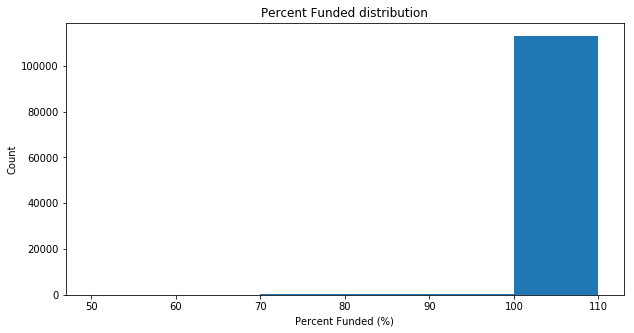

In [111]:
perc_fund = prosper_clean['PercentFunded']*100

binsize = 10
bins = np.arange(50, perc_fund.max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = perc_fund, bins = bins)
plt.xlabel('Percent Funded (%)')
plt.ylabel('Count')
plt.title('Percent Funded distribution')
plt.show()

- Percent the listing was funded.
- Most loans were 100% funded. The others were funded between 70% - 99%

#### Investors

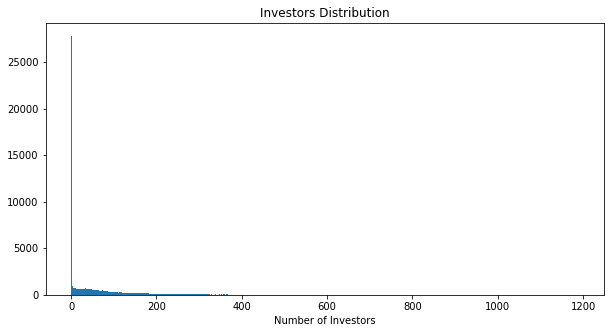

In [112]:
binsize = 1
bins = np.arange(0, prosper_clean['Investors'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = prosper_clean, x = 'Investors', bins = bins)
plt.xlabel('Number of Investors')
plt.title('Investors Distribution')
plt.show()

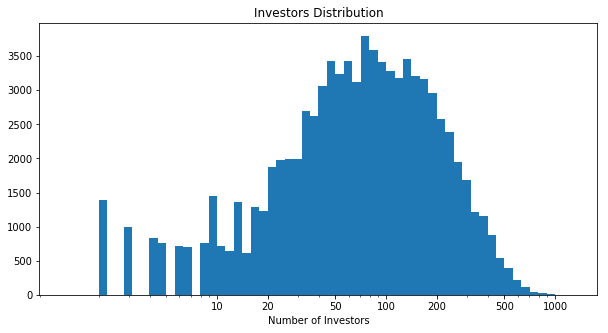

In [113]:
#On a log-scale excluding loans with 1 investor
log_binsize = 0.05
bins = 10 ** np.arange(0.1, np.log10(prosper_clean['Investors'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = prosper_clean, x = 'Investors', bins = bins)
plt.xscale('log')
plt.xticks([1e1,2e1,5e1,1e2, 2e2,5e2,1e3], ['10', '20','50','100','200','500','1000'])
plt.xlabel('Number of Investors')
plt.title('Investors Distribution')
plt.show()

- The number of investors that funded the loan. 
- Plotting the initial histogram showed us that most of the loans were funded by 1 investor. Therefore, if we wanted to see the true distrubution of investors, we had to exclude those loans with 1 investor. The long-tail prompted us to plot this on a log-scale.
- Excluding the loans funded by 1 investor, most of the loans were funded by about 70 investors.

### Qualitative Data

#### Term

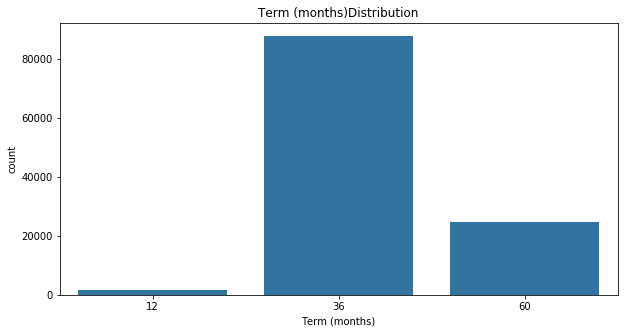

In [114]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[10, 5])
sb.countplot(data=prosper_clean,x='Term',color=base_color)
plt.xlabel('Term (months)')
plt.title('Term (months)Distribution');


- This is the length of the loan expressed in months. 
- Most loans are over 3 years followed by 5 years and the least common is for 1 year. 

#### LoanStatus

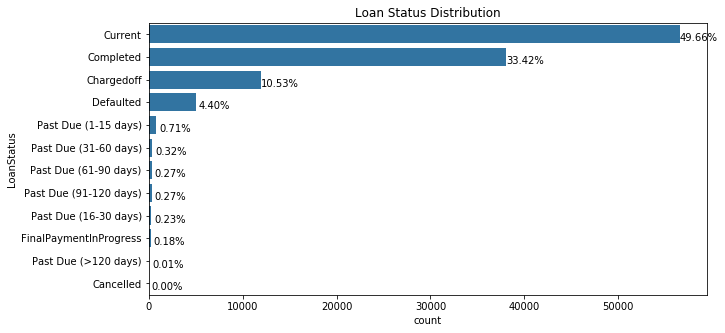

In [115]:
status_order = prosper_clean['LoanStatus'].value_counts().index

plt.figure(figsize=[10, 5])
sb.countplot(data=prosper_clean,y='LoanStatus',color=base_color,order=status_order);
plt.title('Loan Status Distribution')

# add annotations
n_points = prosper_clean.shape[0]
cat_counts = prosper_clean['LoanStatus'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.02f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+2000, loc+0.3,  pct_string, ha = 'center');

- This shows the current status of the loan. 
- Interestingly, almost none of the loans have been cancelled. 
- Most of them are in the 'current' category.


#### ProsperRating

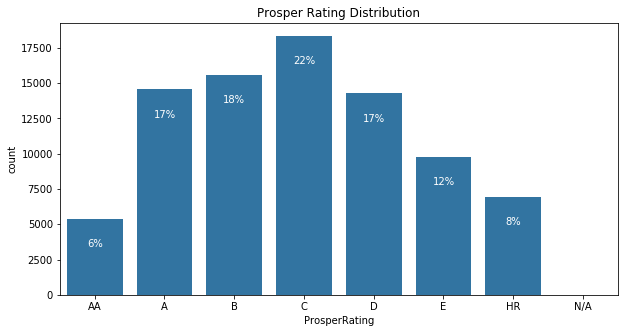

In [116]:
plt.figure(figsize=[10, 5])
sb.countplot(data=prosper_clean,x='ProsperRating',color=base_color);
plt.title('Prosper Rating Distribution')

# add annotations
n_points = prosper_clean[prosper_clean['ProsperRating'].isna() == False].shape[0]
cat_counts = prosper_clean['ProsperRating'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc,  count-2000, pct_string, ha = 'center', color = 'w');

- This is rating assigned by Prosper loans at the time the loan was created.
- 22% is the most common rating for Prosper loans. 

#### ProsperScore

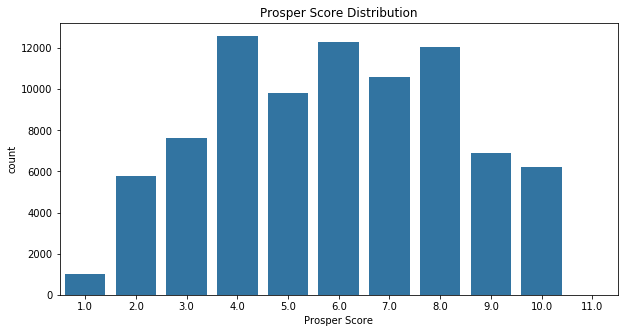

In [117]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[10, 5])
sb.countplot(data=prosper_clean,x='ProsperScore',color=base_color)
plt.xlabel('Prosper Score')
plt.title('Prosper Score Distribution');

- This is a custom risk score built using historical Prosper data.
- The most common Prosper scores for prosper loans are 4, 6 and 8.

#### ListingCategory

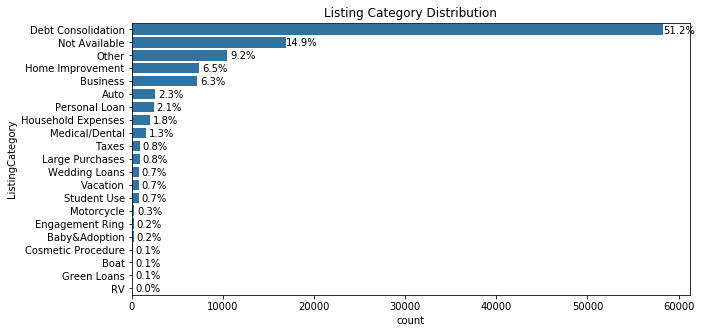

In [118]:
cat_order = prosper_clean['ListingCategory'].value_counts().index
plt.figure(figsize=[10, 5])
sb.countplot(data=prosper_clean,y='ListingCategory',color=base_color, order=cat_order);
plt.title('Listing Category Distribution')

# add annotations
n_points = prosper_clean.shape[0]
cat_counts = prosper_clean['ListingCategory'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.01f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+1700, loc+0.3,  pct_string, ha = 'center', color = 'black');

- This is the category of the listing that the borrower selected when posting their listing. 
- Most of the Listings on Prosper loans are for debt consolidations comprising of about 51% of the total listings. 


#### Occupation

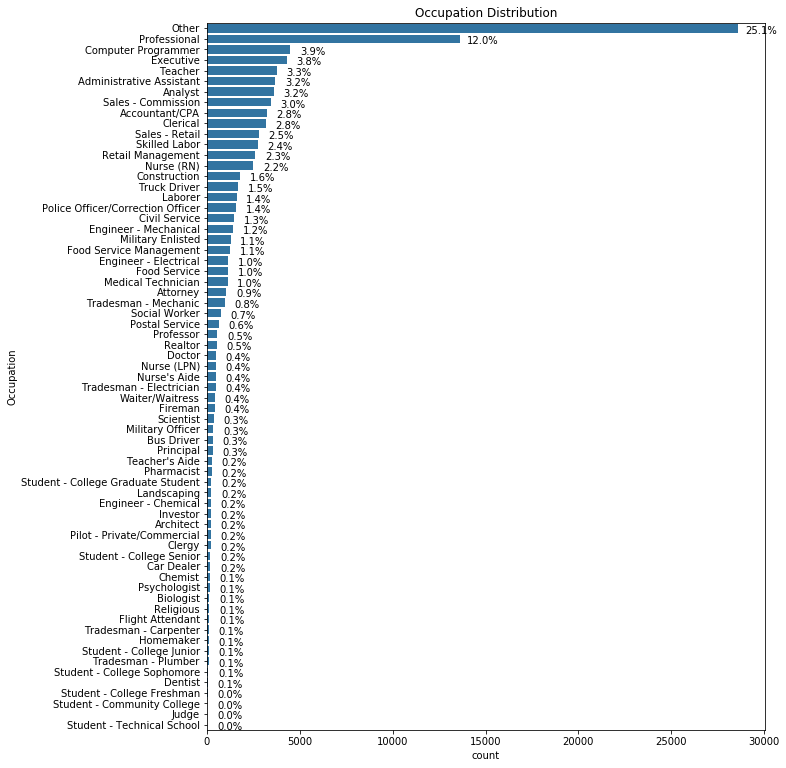

In [119]:
cat_order = prosper_clean['Occupation'].value_counts().index
plt.figure(figsize=[10, 13])
sb.countplot(data=prosper_clean,y='Occupation',color=base_color, order=cat_order);
plt.title('Occupation Distribution')

# add annotations
n_points = prosper_clean.shape[0]
cat_counts = prosper_clean['Occupation'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.01f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+1200, loc+0.5,  pct_string, ha = 'center', color = 'black');

- The Occupation selected by the Borrower at the time they created the listing.
- Asides Other and Proffesional, the most common occupation of the Prosper Loan Borrowers are Computer Programmers, Executives and Teachers. 

#### BorrowerState

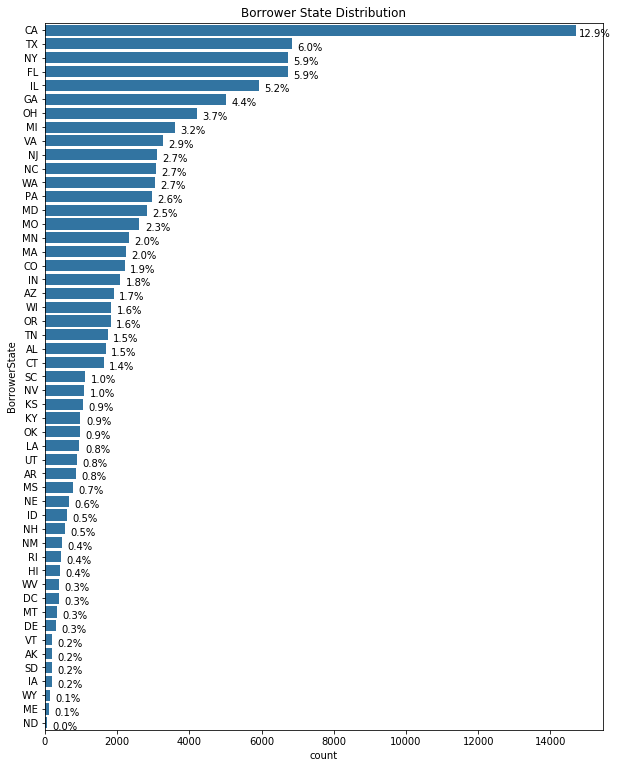

In [120]:
cat_order = prosper_clean['BorrowerState'].value_counts().index
plt.figure(figsize=[10, 13])
sb.countplot(data=prosper_clean,y='BorrowerState',color=base_color, order=cat_order);
plt.title('Borrower State Distribution')

# add annotations
n_points = prosper_clean.shape[0]
cat_counts = prosper_clean['BorrowerState'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.01f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+500, loc+0.5,  pct_string, ha = 'center', color = 'black');

- The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
- Most of Prosper loan's borrowers lived in California, Texas and New York at the time their listings were created. 

#### EmploymentStatus

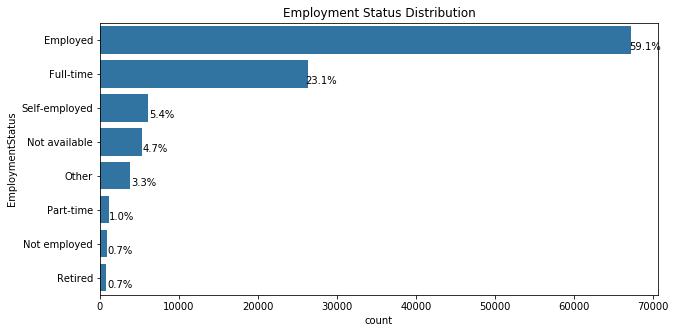

In [121]:
cat_order = prosper_clean['EmploymentStatus'].value_counts().index
plt.figure(figsize=[10, 5])
sb.countplot(data=prosper_clean,y='EmploymentStatus',color=base_color, order=cat_order);
plt.title('Employment Status Distribution')

# add annotations
n_points = prosper_clean.shape[0]
cat_counts = prosper_clean['EmploymentStatus'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.01f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+1700, loc+0.3,  pct_string, ha = 'center', color = 'black');

- This is the Borrower's credit score change at the time the credit profile was pulled. This will be the change relative to the borrower's last Prosper loan. This value will be null if the borrower had no prior loans.
- Most Prosper Loan's borrowers are employed and thats about 59% of all the borrowers.

#### IncomeRange

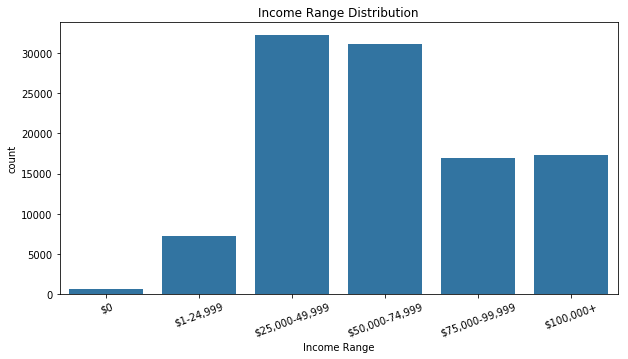

In [122]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[10, 5])
sb.countplot(data=prosper_clean,x='IncomeRange',color=base_color)
plt.xlabel('Income Range')
plt.title('Income Range Distribution')
plt.xticks(rotation=20);

- The income range of the borrower at the time the listing was created.
- Most of the borrower's at Prosper Loans' are in the income range between \\$25000 - \\$49999. A good number of them are also in the \\$50000 - \\$74,999 range.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


I explored 9 Quantitative and 9 Qualitative datasets. There were some interesting insights which I shall be sharing them in the subsequent paragraphs. 
 
The distributions of the `BorrowerRate` and `LenderYield` feature seem very similar, both peaking around 32%. After some research it turns out that they are indeed similar. The only difference is that the BorrowerAPR feature includes a servicing fee which I believe is Prosper Loans commission for providing its service. 

The distribution of the `DebtToIncomeRatio` feature was plotted on a log like scale because most of its loans were on the low debt to income ration end. This proved to me that indeed Prosper Loans' attracts borrowers with good financial status. This is further confirmed in the `MonthlyStatusIncome` distribution with most of its customers earning a monthly income between \\$3000 - \\$7000. There were also some outliers here earning well over \\$50000 monthly. I believe these few people earning over \\$50000 are those who borrowed above \\$30000 on the `LoanOriginalAmount` distribution. I had to use a small binsize to see these outliers in the LoanAmount feature. 

Initially, plotting the `Investor` feature on a histogram made it seem like almost all loans were funded by 1 investor. However after excluding all loans funded by one investor and plotting the remaining on a log-like distribution, I found that a lot of these loans had up to 70 investors. This might be due to some form of peer-to-peer lending that Prosper Loans' offer. 

The distribution of the `Term` feature on a bar chart showed that most loans offered by Prosper Loans are medium term loans of about 3 years with very few short term loans. 
The distibution of the `ProsperScore` feature shows that most of the loans are fairly risky with most of them having scores between 4 and 8. The `ProsperRating` distribution further confirms this. 

I discovered something quite interesting after plotting the `Occupation` feature on a horizontal bar chart. Most of the borrowers' occupation was classed as 'other'. This might be because most of the borrowers have very specific job titles which aren't included in the list of occupation types. 
Students make up a small percentage of Prosper Loans' borrowers and from this we can conclude that the debt consolidation purpose for loans didnt include many student loans. 

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [123]:
numeric_vars = ['BorrowerAPR','BorrowerRate','LenderYield','DebtToIncomeRatio','EstimatedReturn',
                'StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment','PercentFunded','Investors']

categoric_vars = ['Term', 'LoanStatus', 'ProsperRating', 'ProsperScore', 'ListingCategory', 
                'Occupation', 'BorrowerState','EmploymentStatus','IncomeRange']

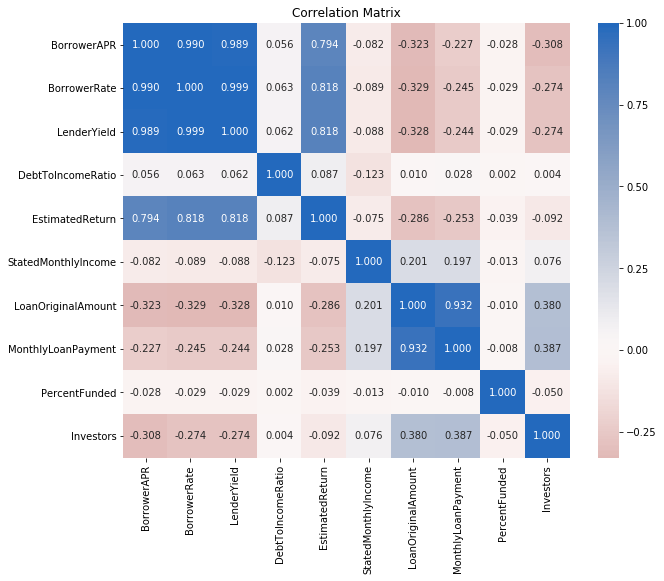

In [124]:
#Correlation plot
plt.figure(figsize = [10, 8])
sb.heatmap(prosper_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.margins(x = 0.5, y= 0.3)
plt.show()

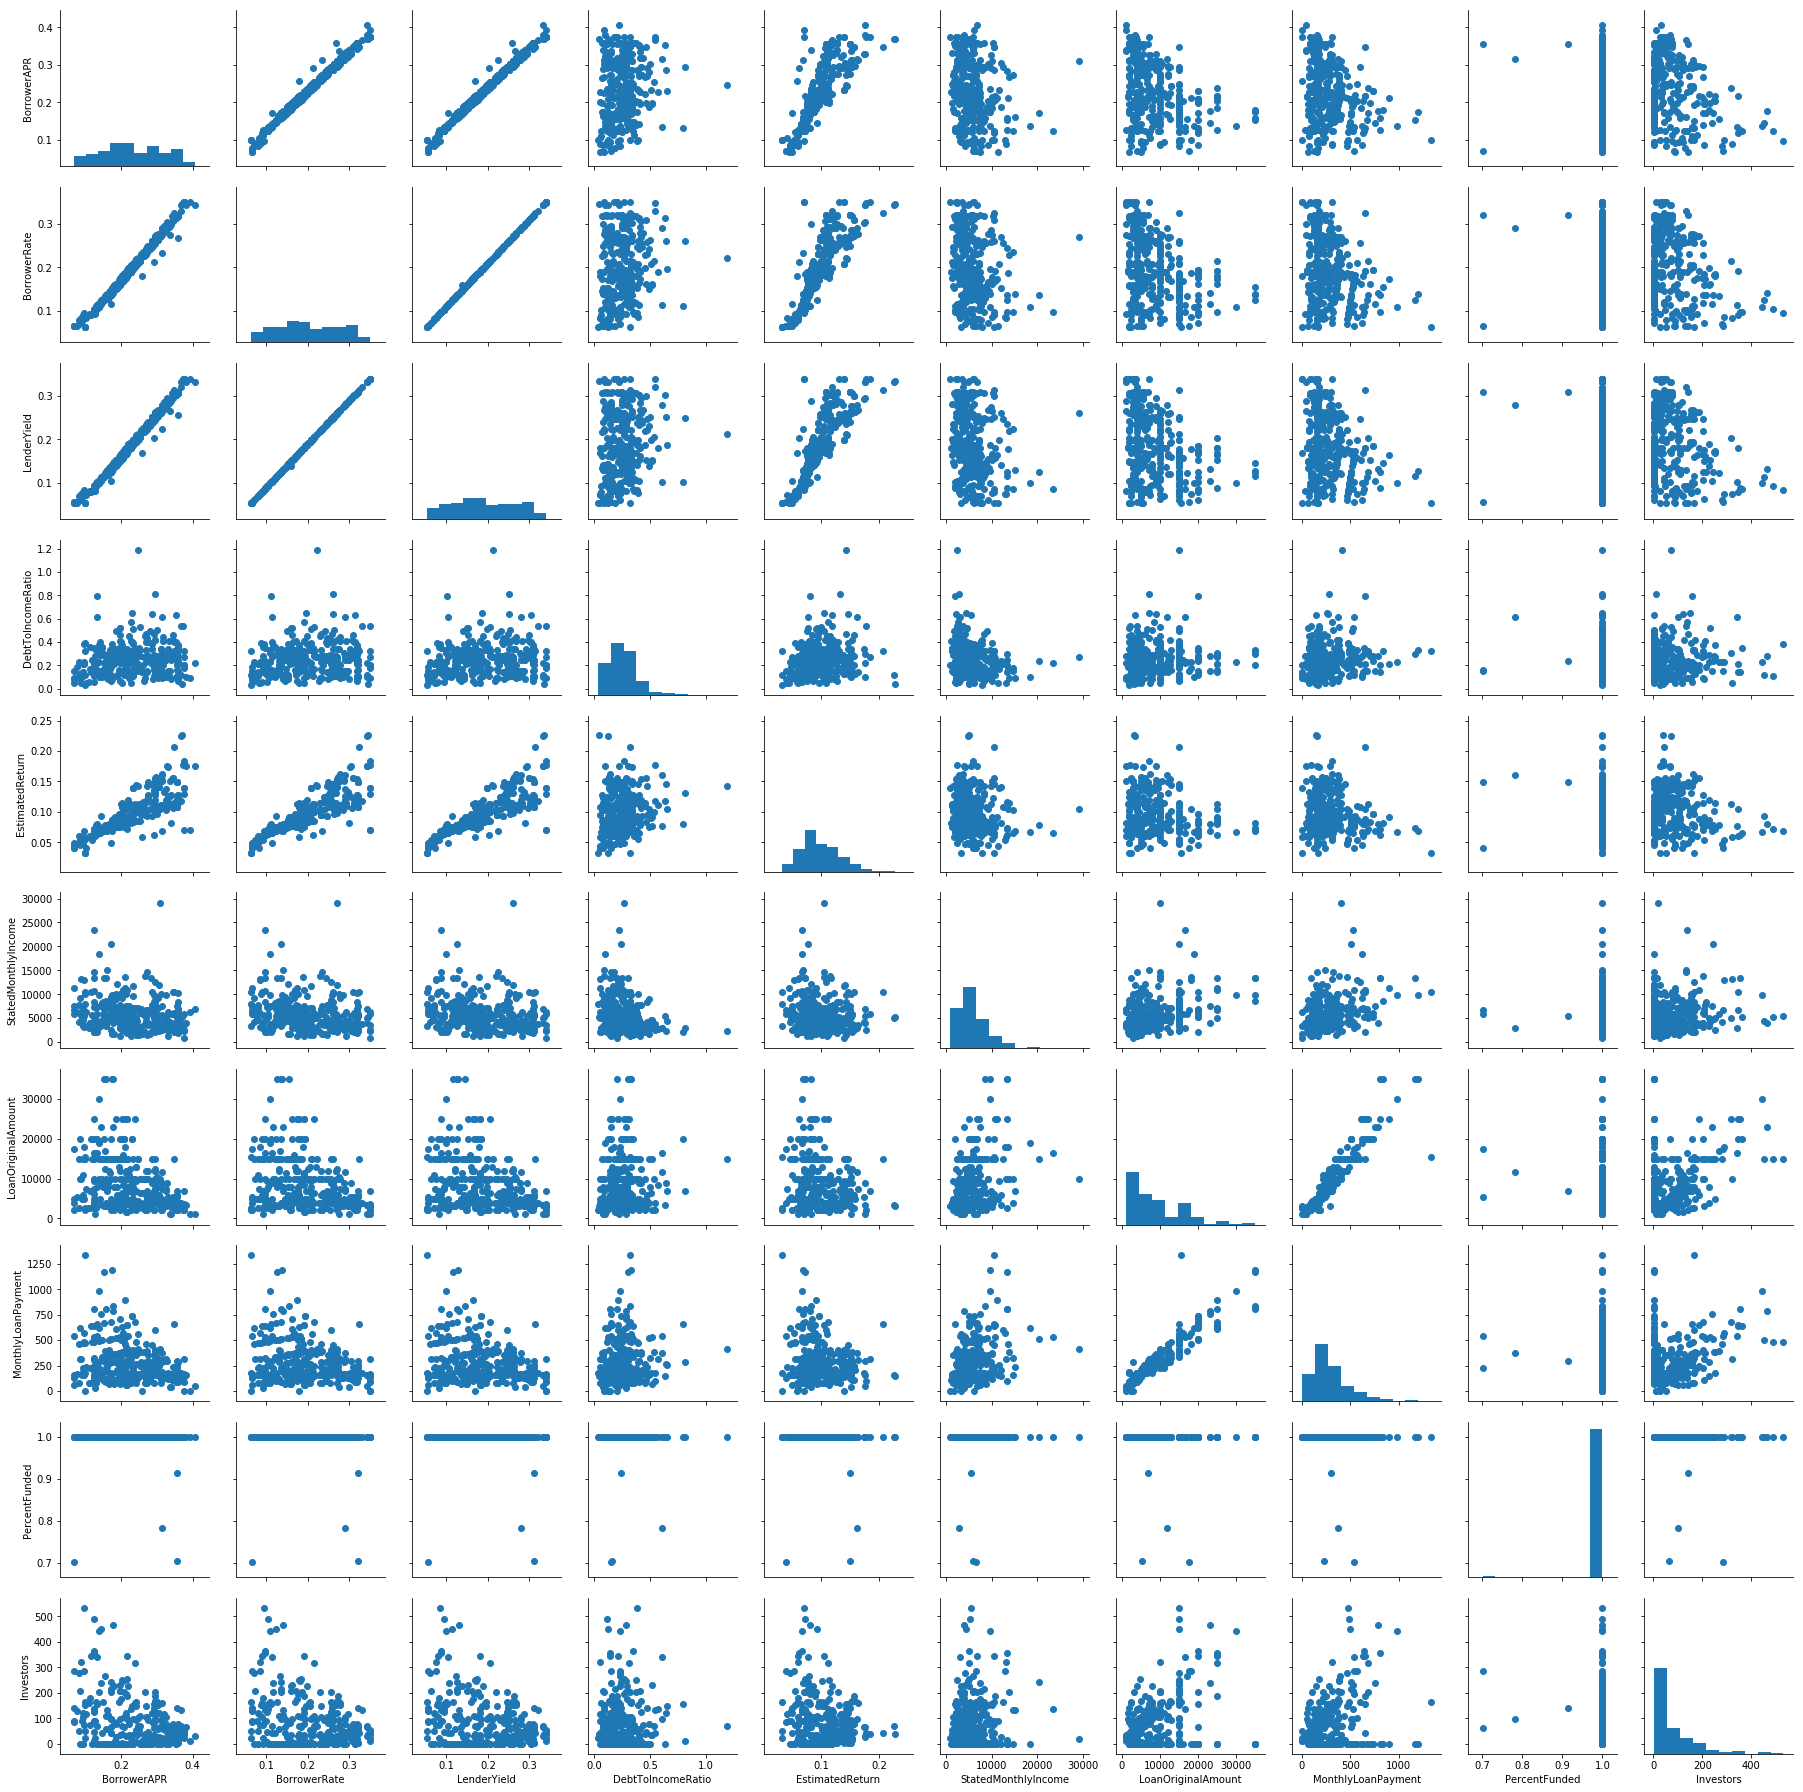

In [125]:
# plot matrix: sample 500 loans so that plots are clearer and
# they render faster
samples = np.random.choice(prosper_clean.shape[0], 500, replace = False)
prosper_samp = prosper_clean.loc[samples,:]
prosper_samp = prosper_samp.dropna()
g = sb.PairGrid(data = prosper_samp, vars = numeric_vars)
g.map_offdiag(plt.scatter)
g = g.map_diag(plt.hist, bins = 10);


- As expected, `BorrowerRate` and `LenderYield` have a strong positive relationship. This makes sense because the only difference between both is a very small 'servicing fee' which Prosper Loans collect as commission. This isn't surprising because when borrowers borrow money from lenders via a platform(Prosper Loans in this case), they have to pay it back with interest and a small charge. This interest is essentially the benefit the lenders gain on providing the funds. 

- `BorrowerAPR` and `BorrowerRate` also have a strong positive relationship. This is because the difference between both is the charge/fees added to the BorrowerAPR feature. This is a more accurate cost of taking out a loan and this is the generally preferred rate that people use to compare loan offers. A higher APR inherently increases the interest rate on the loan. 

- `LoanOriginalAmount` and `MonthlyLoanPayment` have a fairly strong positive relationhip. This is expected because an increase in the amount borrowed inceases the amount that has to be paid back each month. 

- `LoanOriginalAmount` and `BorrowerAPR` have a fairly strong negative relationship. This isnt surprising because on relative terms, the larger the loan amount,  the lower amount of interest being charged.

- `LenderYield` and `Investors` have a negative relationship. This makes sense becaause, the more investors investing in one loan, the less amount they all stand to gain individually. 

- An obvious positive relationship is that between `ExpectedReturn` and `BorrowerAPR`. The higher the interest rate, the more an investor stands to make in return. 

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


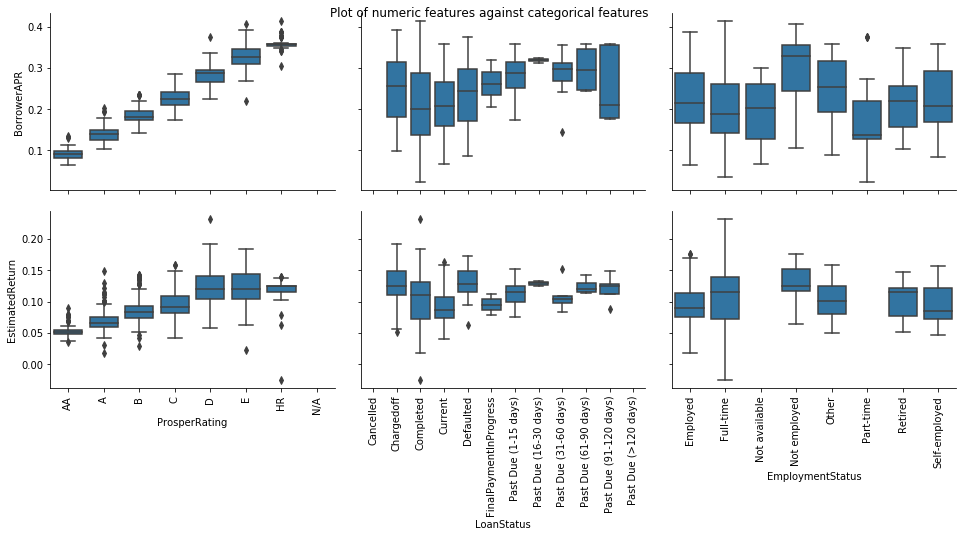

In [126]:
# plot matrix of numeric features against categorical features.
samples = np.random.choice(prosper_clean.shape[0], 2000, replace = False)
prosper_samp = prosper_clean.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [15, 10])
g = sb.PairGrid(data = prosper_samp, y_vars = ['BorrowerAPR', 'EstimatedReturn'], 
                    x_vars = ['ProsperRating','LoanStatus','EmploymentStatus'],size = 3, aspect = 1.5);
#Set axis
for ax in g.axes.flatten(): 
    for tick in ax.get_xticklabels(): 
        tick.set(rotation=90)
    
g.map(boxgrid);
g.fig.suptitle('Plot of numeric features against categorical features',fontsize=12);
plt.show();

- As expected there's a strong negative relationship between `BorrowerAPR` & `ProsperRating` and between `EstimatedReturn` & `ProsperRating`. The lower the Prosper rating i.e increase in level of risk, the higher the BorrowerAPR and EstimatedReturn to accomodate for the risk.

- Most Completed and Current loans had a lower rate of interest and return compared to those that were past due. Again this is due to the risk involved in loans that have past their due back dates. 

- As expected loans borrowed by those receiving some form of income (i.e Employed, Full-time, Other, Part-time, Retired and Self-employed) have a lower rate of interest as they're more likely to be paid back compared to the loans borrowed by those who are unemployed. 

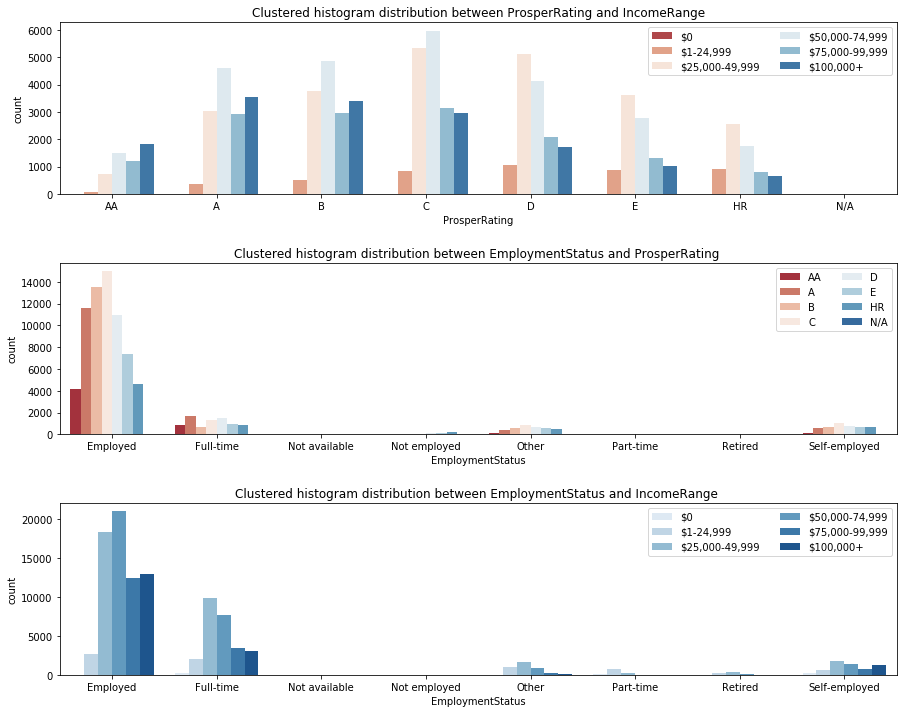

In [127]:
plt.figure(figsize = [15, 12])

# subplot 1: ProsperRating vs. IncomeRange
ax = plt.subplot(3, 1, 1)
sb.countplot(data = prosper_clean, x = 'ProsperRating', hue = 'IncomeRange', palette = 'RdBu')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.title('Clustered histogram distribution between ProsperRating and IncomeRange')
# subplot 2: EmploymentStatus vs. ProsperRating
ax = plt.subplot(3, 1, 2)
sb.countplot(data = prosper_clean, x = 'EmploymentStatus', hue = 'ProsperRating', palette = 'RdBu')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.title('Clustered histogram distribution between EmploymentStatus and ProsperRating ')

# subplot 3: EmploymentStatus vs. IncomeRange
ax = plt.subplot(3, 1, 3)
sb.countplot(data = prosper_clean, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.title('Clustered histogram distribution between EmploymentStatus and IncomeRange ')

plt.subplots_adjust(hspace = 0.4)
plt.show()

- Loans taken by borrowers on low-level income (\\$1 - \\$24,999) are being rated more risky (i.e C, D, E and HR). This makes sense because the lower they earn the less disposable income they have to pay back their debts. Conversely, loans taken by borrowers on mid - high level income are rated more safe (i.e. AA, A, B) because they are deemed to have more disposable income to meet their monthly loan repayments. 

- Notice that loans taken by most borrowers who are classed as just 'Employed' have a C rating which is fairly risky. I believe this is because most of the borrowers classed in the Employed section are mainly mid- low level income earners. On the other hand, most loans taken by borrowers who work full-time are classed as A which is very safe. This is because of the job security a full-time job offers. 
    - It is interesting to see that loans taken by borrowers who are self-employed have more risky ratings. The reason being because most self employed workers are in charge of their business and can decide to take more risky decisions which may hurt their business. 
    
- As expected borrowers who are employed and working full-time are in the  mid - high level income range. However, very few of these borrowers in the employed and full-time group aren't earning any form of income. I believe these are students in some form of zero-pay internship. It'll be interesting to see the ratings these interns get for their loans. 

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


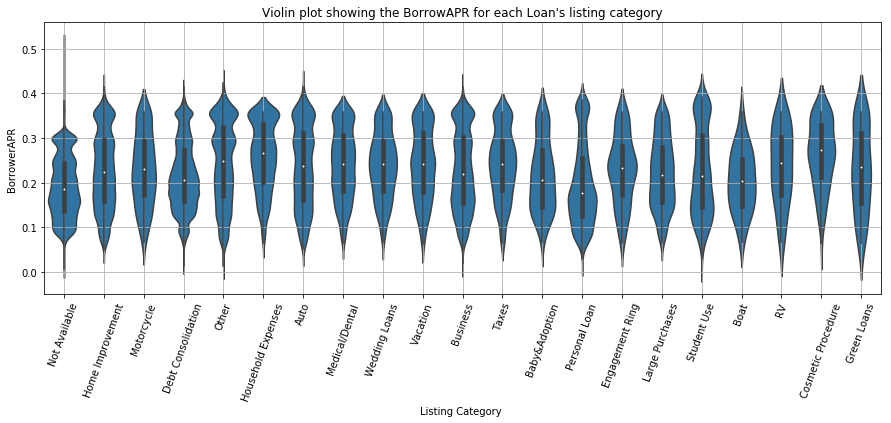

In [128]:
plt.figure(figsize = [15, 5])
sb.violinplot(data=prosper_clean,x='ListingCategory', y='BorrowerAPR',color=base_color);
plt.xlabel('Listing Category ');
plt.ylabel('BorrowerAPR');
plt.title("Violin plot showing the BorrowAPR for each Loan's listing category")
plt.grid()
plt.xticks(rotation=70);

- It is interesting to see that loans taken for 'student use' have quite high interest rates and some of them have pretty low interest rates. I believe this depends on the student's level of education. It'll be interesting to see some information on the level of education or age for students who took out loans. This will help us come to a definitive conclusion. 

- Green loans are loans taken out for the sole purpose of supporting and investing in environmentally sustainable economic activities. I believe the interest rates for these are quite high because it is a fairly new type of investment hence companies such as Prosper loans aren't quite sure about how to assess their chances of success just yet. It makes sense that they'll rather be pessimistic in their assessments than sanguine.

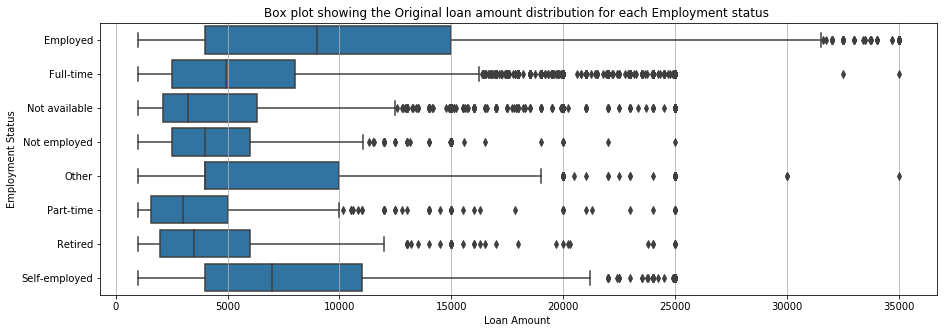

In [129]:
plt.figure(figsize = [15, 5])
sb.boxplot(data=prosper_clean,x='LoanOriginalAmount', y='EmploymentStatus',color=base_color);
plt.xlabel('Loan Amount ');
plt.ylabel('Employment Status');
plt.title("Box plot showing the Original loan amount distribution for each Employment status ")
plt.grid(axis='x');
#plt.xticks(rotation=70);

- It doesn't come as a surprise that borrowers who are Employed and working full-time are taking relatively large amount of loans. They have some form of steady income hence they can afford to pay it back.
- Meanwhile, it interesting to see that there are some outliers in the non-employed section taking quite large amounts of loans. My guess is that these are students in higher education such as masters or Phd programmes which can be quite expensive. 


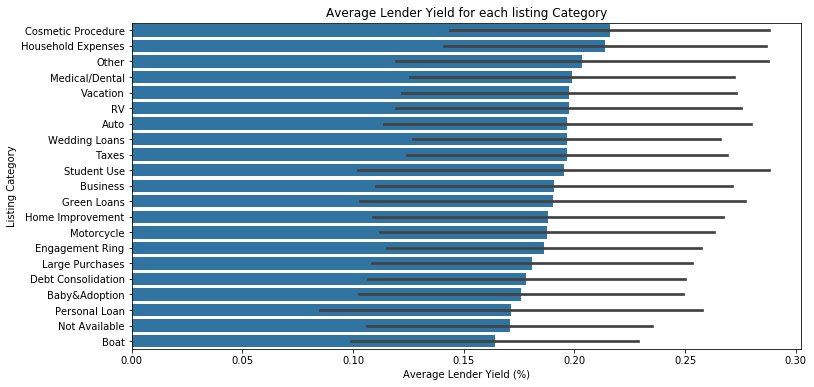

In [130]:
list_cat_means = prosper_clean.groupby('ListingCategory').mean()
comb_order = list_cat_means.sort_values('LenderYield', ascending = False).index

plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.barplot(data = prosper_clean, x = 'LenderYield', y = 'ListingCategory',
               color = base_color, order = comb_order, ci = 'sd')
plt.xlabel('Average Lender Yield (%)')
plt.ylabel('Listing Category')
plt.title('Average Lender Yield for each listing Category');

- It is not a shock to see that the average yield on loans borrowed for cosmetic procedures are quite high. Anyone can choose to carry out this procedure regardless of their income status, hence it becomes risky to fund these loans. Therefore, investors need to be compensated for the level of riskiness.
- I guess the yield on loans taken to buy a boat is quite low because, borrowers purchasing a boat are probably quite well off and understand how to use debt effectively. Investing in these loans is very much a risk averse approach and investors can be quite certain that these borrowers will pay back their outstanding debts. This level of safety in the investment is the reason for the low yield.  

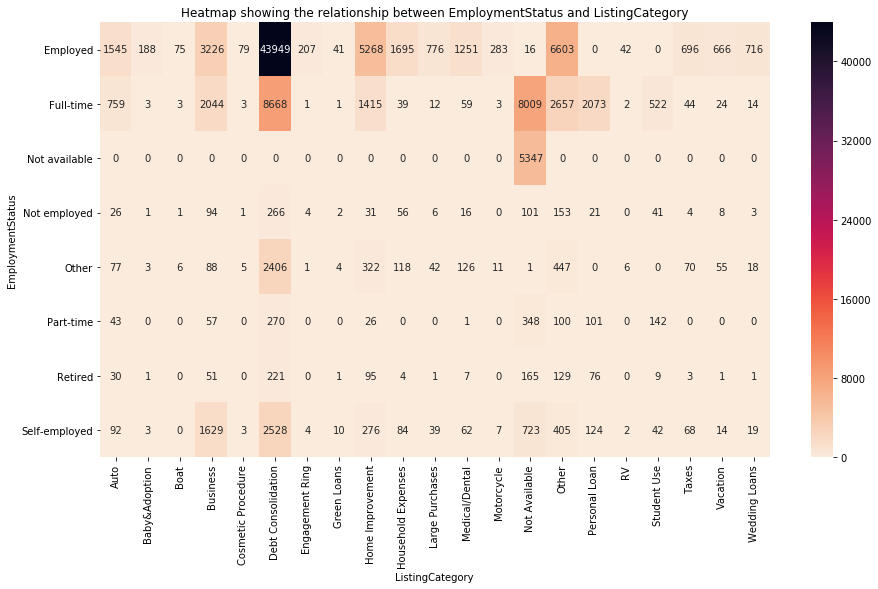

In [141]:
cat_counts = prosper_clean.groupby(['ListingCategory', 'EmploymentStatus']).count()['ListingKey']
cat_counts = cat_counts.reset_index()
cat_counts = cat_counts.rename(columns={'ListingKey': 'count'})
cat_counts = cat_counts.pivot(index = 'EmploymentStatus', columns = 'ListingCategory', values = 'count')
cat_counts.fillna(0, inplace=True)

plt.figure(figsize = [15, 8])
sb.heatmap(cat_counts, cmap = 'rocket_r', annot = True, fmt = ".0f")
plt.title('Heatmap showing the relationship between EmploymentStatus and ListingCategory');

- The debt consolidation column seemed to have the highest count for each employment status. This shouldn't come as a surprise becase as we saw in the 'ListingCategory', it was the most popular reason for taking out loans. 
- Home improvement is another common reason borrowers take out loans and this was very popular among the employed and full-time workers. However, the Self-employed workers seemed to be more interested in business than Home improvement. This makes sense because most self-employed workers don't have a large enough team to pool resources and make investments, hence they result to borrowing from lenders. 


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- It was very interesting to see the distribuiton of the `BorrowerAPR` across the different `ListingCategories`. 
    - Some loans taken out for student use were given a high interest rate. Loans to students can be quite risky as most of them don't have a steady form of income to repay the loans, hence the high interest rates. However, the other end of the violin plot above shows that some loans taken for student use have low interest rates. These loans might be for students doing a masters degree paid for by organisations. In this case, they have jobs they can go back to therefore it becomes less risky to give loans to this group. 
- It was also interesting to see the relationship between `BorrowerAPR` and `EmploymentStatus`.
    - Loans borrowed by those receiving some form of income (i.e Employed, Full-time, Other, Part-time, Retired and Self-employed) had a lower rate of interest as they're more likely to pay back compared to the loans borrowed by those who are unemployed. 
    - The interest rates for those who are self-employed were also higher compared to those in full-time jobs due to job security. 



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- There was an interesting relationship between `EstimatedReturn` and `ProsperRating`. The returns on loans rated to be more risky were higher than the less risky ones. 

- Borrowers `EmploymentStatus` was a deciding factor in the `ProsperRatings` for the loans. 
    - Most loans taken by borrowers who were just 'employed' were given a rating of C. However, most of the loans taken by full-time workers were given an A rating. 

## Multivariate Exploration 



In [131]:
#Change ProsperScore to numerical variable for more analysis
prosper_clean['ProsperScore']=prosper_clean['ProsperScore'].astype('float64')

In [132]:
prosper_clean.describe()

,BorrowerAPR,BorrowerRate,LenderYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,LP_ServiceFees,LP_CollectionFees,PercentFunded,Investors
count,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,105383.000000,1.139370e+05,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,0.218828,0.192764,0.182701,0.080306,0.096068,4.072243,5.932907,0.275947,5.608026e+03,8337.01385,272.475783,-54.725641,-14.242698,0.998584,80.475228
std,0.080364,0.074818,0.074516,0.046764,0.030403,1.673227,2.343355,0.551759,7.478497e+03,6245.80058,192.697812,60.675425,109.232758,0.017919,103.239020
min,0.006530,0.000000,-0.010000,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000e+00,1000.00000,0.000000,-664.870000,-9274.750000,0.700000,1.000000
25%,0.156290,0.134000,0.124200,0.042400,0.074080,3.000000,4.000000,0.140000,3.200333e+03,4000.00000,131.620000,-73.180000,0.000000,1.000000,2.000000
50%,0.209760,0.184000,0.173000,0.072400,0.091700,4.000000,6.000000,0.220000,4.666667e+03,6500.00000,217.740000,-34.440000,0.000000,1.000000,44.000000
75%,0.283810,0.250000,0.240000,0.112000,0.116600,5.000000,8.000000,0.320000,6.825000e+03,12000.00000,371.580000,-13.920000,0.000000,1.000000,115.000000
max,0.512290,0.497500,0.492500,0.366000,0.283700,7.000000,10.000000,10.010000,1.750003e+06,35000.00000,2251.510000,32.060000,0.000000,1.012500,1189.000000


In [133]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(1, 12, 2)
    bins_y = np.arange(0, 0.58, 0.08)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:897: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


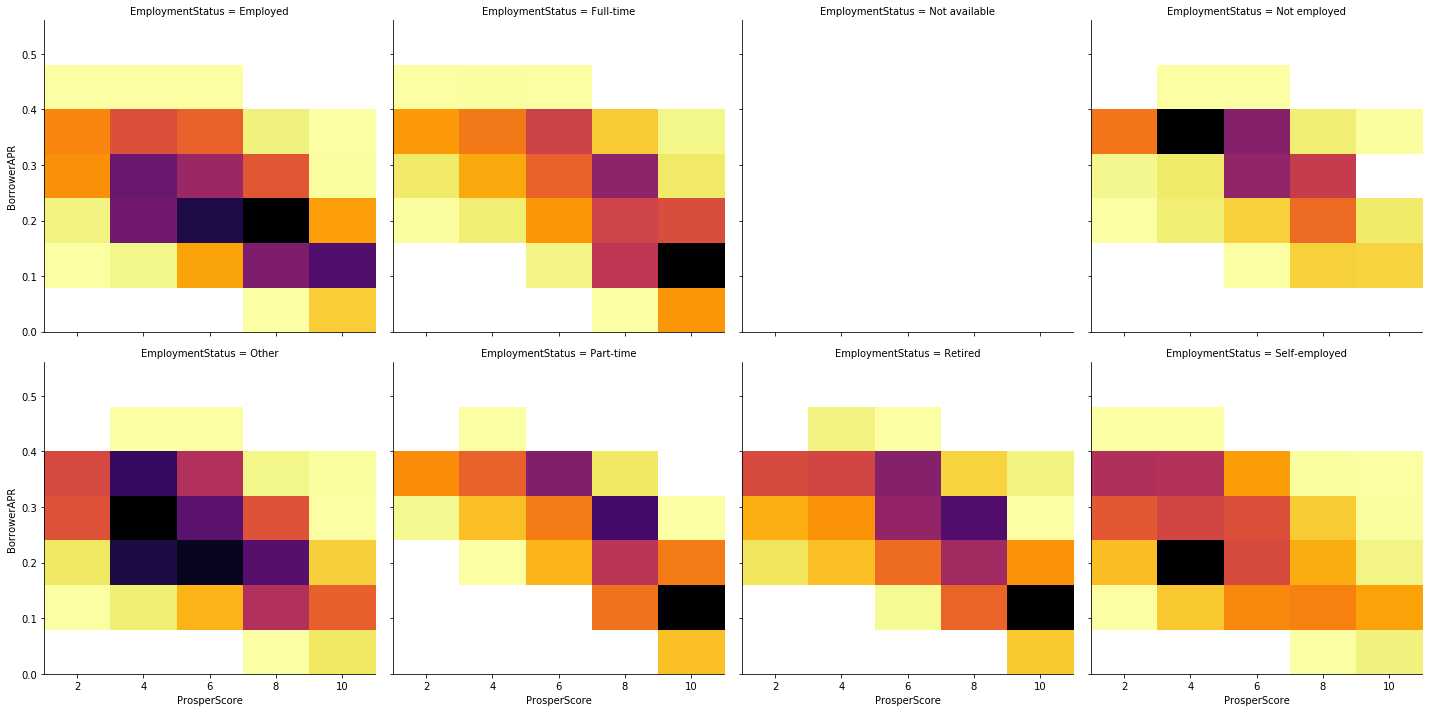

In [134]:
# create faceted heat maps on the EmploymentStatus
g = sb.FacetGrid(data = prosper_clean, col = 'EmploymentStatus', col_wrap = 4, size = 5)
g.map(hist2dgrid, 'ProsperScore', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('ProsperScore')
g.set_ylabels('BorrowerAPR')
plt.show();

- Prosper Score is a custom risk score built using historical prosper data. It ranges from 1-10 with 10 being the lowest risk score. 


- The heatmaps for the different employment groups point out a few things:
    - Most loans taken out by borrowers who receive some form of steady income (i.e Employed, full-time, part-time and retired) have high prosper scores and a low BorrowerAPR. This suggests that these loans are less risky, hence the low interest rates. 
    - Loans taken out by borrowers who are self-employed have a pretty low prosper score probably because historically, borrowers with this employment status have found it difficult to pay back their loans. However, it is interesting to see that most of these loans have a fairly low interest rate. 
    - It is no shock that loans taken out by the unemployed borrowers have a low prosper score and high interest rates. These borrowers have no form of steady income therefore, it can be quite risky for investors choosing to fund these loans. This is why these borrowers are charged such high interest rates. 

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


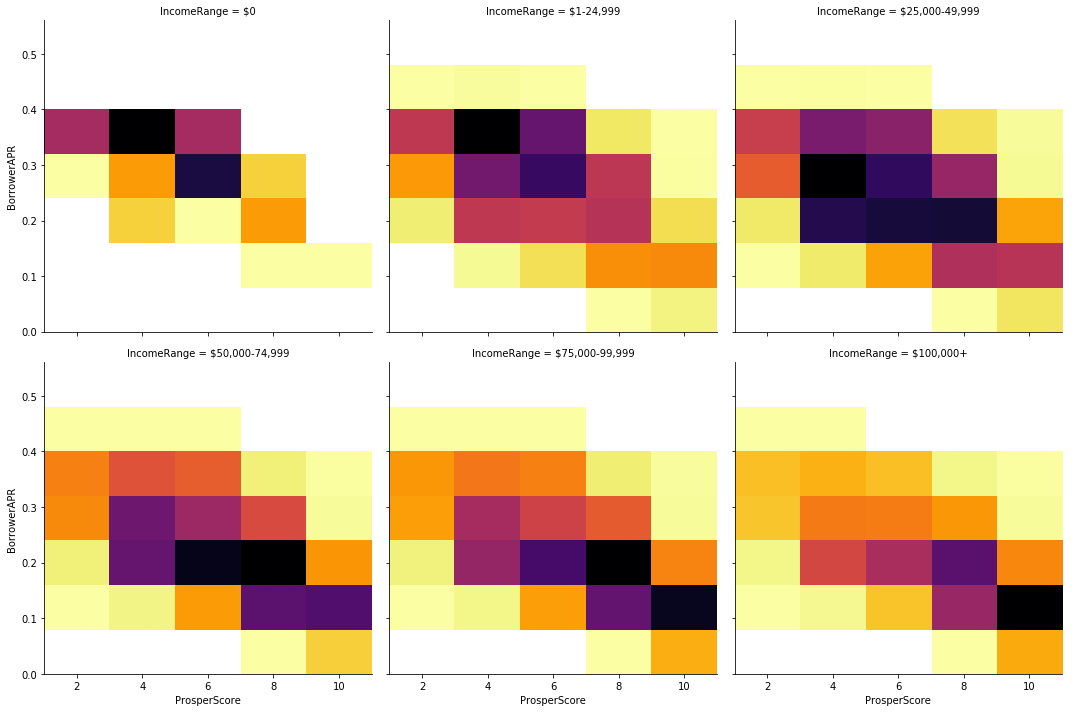

In [135]:
# create faceted heat maps on the EmploymentStatus
g = sb.FacetGrid(data = prosper_clean, col = 'IncomeRange', col_wrap = 3, size = 5)
g.map(hist2dgrid, 'ProsperScore', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('ProsperScore')
g.set_ylabels('BorrowerAPR')
plt.show();

- Starting from the first heatmap (i.e for borrowers in the \\$0 income range) and moving to the last heatmap (i.e. borrowers in the \\$100000+ income range), we see a pattern - most of the loans being borrowed tend to move towards the lower right area of the graph, suggesting low risk and low interest rates.

- This is quite intuitive because as your income increases and you move into higher income ranges, you're deemed more likely to pay back your loans, therefore less risky (higher prosper score). 
    - The interest rates charged on the loans you take begin to decrease as well. Investors don't need to be compensated so much for the low risk they're taking on. 


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


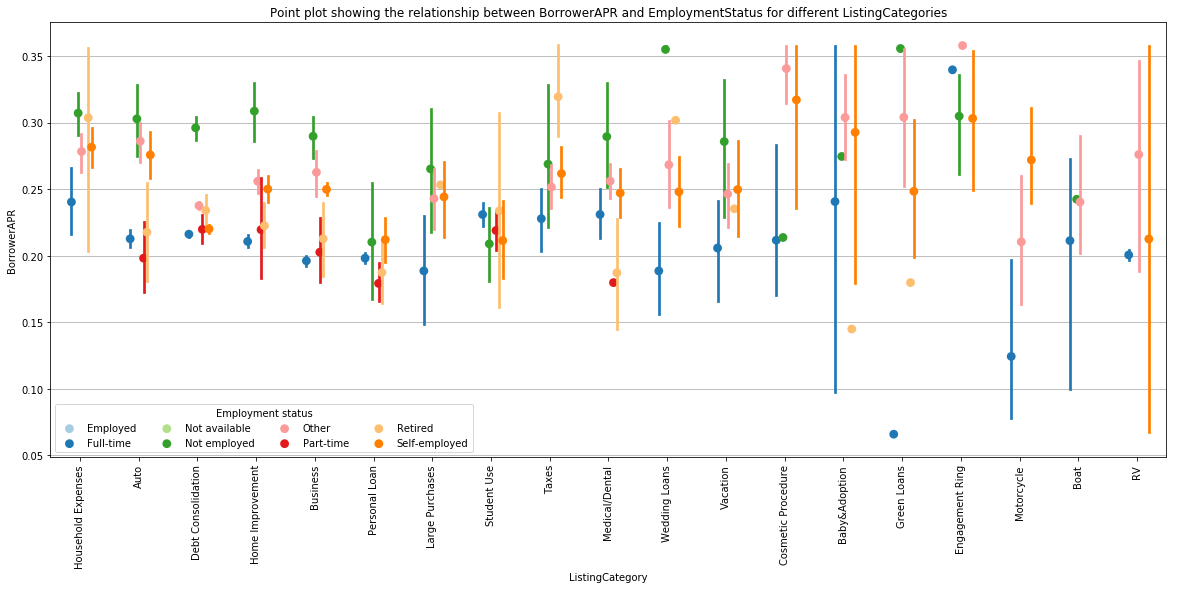

In [142]:
#Excluding Employed, Not Available and Other
prosper_flag = (prosper_clean['EmploymentStatus']!='Employed') &\
            (~prosper_clean['ListingCategory'].isin(['Other','Not Available']))
prosper_clean_sub = prosper_clean.loc[prosper_flag,:]
prosper_clean_sub['EmploymentStatus'].value_counts()

fig = plt.figure(figsize = [20,8])
ax = sb.pointplot(data = prosper_clean_sub, x = 'ListingCategory', y = 'BorrowerAPR', hue = 'EmploymentStatus',
           palette = 'Paired', linestyles = '', dodge = 0.4)
plt.title('Point plot showing the relationship between BorrowerAPR and EmploymentStatus for different ListingCategories')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation = 90)
plt.legend(title='Employment status',ncol=4)
plt.grid(axis = 'y')
plt.show();


- Generally, we see that loans taken out by the ‘not employed’ workers have higher interest rates compared to the loans taken out by the full-time workers. However, there are some interesting insights that the listing category highlights:
- Loans taken out for ‘business use’ by the full-time workers have relatively low interest rates of 20%. The average interest rate for loans taken out by unemployed workers on the other hand is about 29%. I believe this is because if the business investment fails, the unemployed worker has nothing to fall back on unlike the full-time workers who still have their primary jobs to fall back on. 
- Loans taken out by part-time and retired borrowers as ‘Personal loans’ have some of the lowest interest rates of about 15% and 18% respectively. These are loans that aren’t secured against any asset such as a home (i.e. they have no collateral). It’s not quite clear why Prosper Loans will charge such low rates for these loans but I reckon it is because historically, the default rates for 'personal loans' taken by the part-time and retired borrowers have been pretty low. 

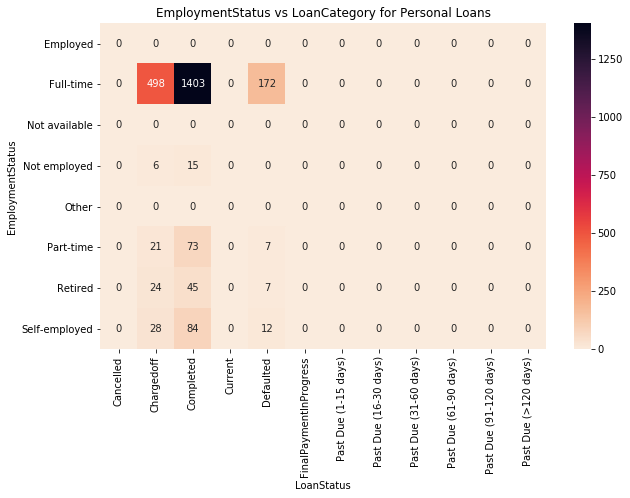

In [143]:
#Filtering for loans taken out as 'Personal Loans'
prosper_clean_sub2= prosper_clean[prosper_clean['ListingCategory']=='Personal Loan']
cat_counts = prosper_clean_sub2.groupby(['EmploymentStatus', 'LoanStatus']).count()['ListingKey']
cat_counts = cat_counts.reset_index()
cat_counts = cat_counts.rename(columns={'ListingKey': 'count'}) 
cat_counts = cat_counts.pivot(index = 'EmploymentStatus', columns = 'LoanStatus', values = 'count')
cat_counts.fillna(0, inplace=True)

plt.figure(figsize = [10, 6])
sb.heatmap(cat_counts, cmap = 'rocket_r', annot = True, fmt = ".0f")
plt.title('EmploymentStatus vs LoanCategory for Personal Loans');

- Looking at the heatmap above, we see that for part-time workers, only 7% out of all part-time workers wwho took personal loans defaulted. And likewise for the retired workers, only 9% of all retired workers who took out personal loans defaulted. 
- These low default rates make sense as to why these employment groups have such low rates of interest. 

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Bar plot showing the relationship between LenderYield and EmploymentStatus in the different Terms')

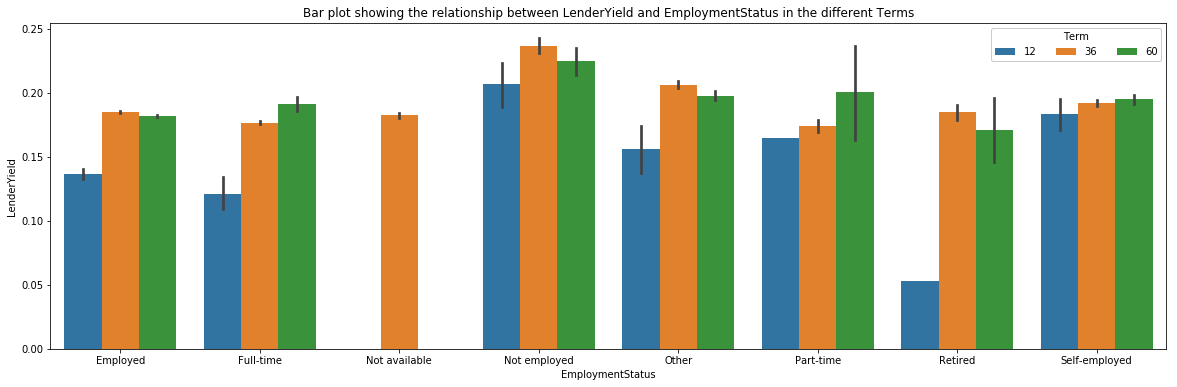

In [140]:
fig = plt.figure(figsize = [20,6])
ax = sb.barplot(data = prosper_clean, x = 'EmploymentStatus', y = 'LenderYield', hue = 'Term')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Term')
plt.title('Bar plot showing the relationship between LenderYield and EmploymentStatus in the different Terms')

- Generally, the yield on long term loand tend to be higher. However, some factors influence the the rate at which they increase. 
- Typically, the yield on loans to full-time workers is lower than the yield on loans to borrowers who are not-employed. The reason for this is to compensate for the risk involved in investing in these loans.  
    - Looking closely at the 'Not employed' section of the chart, it is clear that loans for 3 years tend to yield higher for investors than loans for 5 years. The reason for this might be because a lot of borrowers who are unemployed are students and it takes about 3-4 years to finish a higher education. During this time, students don't really have steady forms of income to be able to fulfill their debt payments so it becomes more risky to invest in them. 
    - Loans for 5 years in this section make sense to be lower because after their 3-4 years of education, these students become much more employable and they can go onto becoming full-time workers. 
    - Of course, this is only certain if they get jobs, this is why the lender yield across all groups is still quite high to accomodate for the risk involved.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- The relationship between `BorrowerAPR`,`ProsperScore` and `IncomeRange` is quite strong. 
    - Starting from the first heatmap (i.e for borrowers in the \\$0 income range) and moving to the last heatmap (i.e. borrowers in the \\$100000+ income range), we see a pattern- as the income range increases, most of the loans being borrowed tend to move towards the lower right area of the graph, suggesting low risk and low interest rates.
    - This is quite intuitive because as your income increases and you move into higher income ranges, you're deemed more likely to pay back your loans, therefore less risky (higher prosper score). 
    - The interest rates charged on the loans you take begin to decrease as well. Investors don't need to be compensated so much for the low risk they're taking on. 

### Were there any interesting or surprising interactions between features?
-  Looking at the first point plot, loans taken out by part-time and retired borrowers as ‘Personal loans’ have some of the lowest interest rates of about 15% and 18% respectively. These are loans that aren’t secured against any asset such as a home (i.e. they have no collateral). It’s not quite clear why Prosper Loans charge such low rates for these loans but I reckon that historically, the default rates for 'personal loans' taken by the part-time and retired borrowers were pretty low.

## References

- Investopedia. 2020. Interest Rate Vs. APR: What's The Difference?. [online] Available at: <https://www.investopedia.com/ask/answers/100314/what-difference-between-interest-rate-and-annual-percentage-rate-apr.asp>.